In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LeakyReLU, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import matplotlib.pyplot as plt# Load dataset from the provided URL
url = 'https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv'
data = pd.read_csv(url)


In [ ]:
# Preprocess the dataset
X = data.drop(columns=['species'])  # Features (all columns except the target)
y = data['species']  # Target column (species)


In [ ]:
# Convert categorical target variable to numerical using one-hot encoding
y = pd.get_dummies(y)  # Convert species to binary columns


In [ ]:

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Standardize the data (feature scaling)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [ ]:

# Build the model
model = Sequential()


In [ ]:
# Input layer
model.add(Dense(128, input_shape=(X_train.shape[1],)))
model.add(LeakyReLU(alpha=0.01))


In [ ]:
# Hidden layers with LeakyReLU activation and Dropout for regularization
model.add(Dense(64))
model.add(LeakyReLU(alpha=0.01))
model.add(Dropout(0.3))
model.add(Dense(32))
model.add(LeakyReLU(alpha=0.01))
model.add(Dropout(0.2))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


In [ ]:
# Output layer with softmax activation for multi-class classification
model.add(Dense(y_train.shape[1], activation='softmax'))

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [ ]:
# Train the model
history = model.fit(X_train, y_train,
                    epochs=50,
                    validation_data=(X_test, y_test),
                    batch_size=32)

# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test)


In [ ]:
# Output results
print(f'Test Accuracy: {test_acc:.4f}')
print(f'Test Loss: {test_loss:.4f}')

Test Accuracy: 0.9794
Test Loss: 0.0720


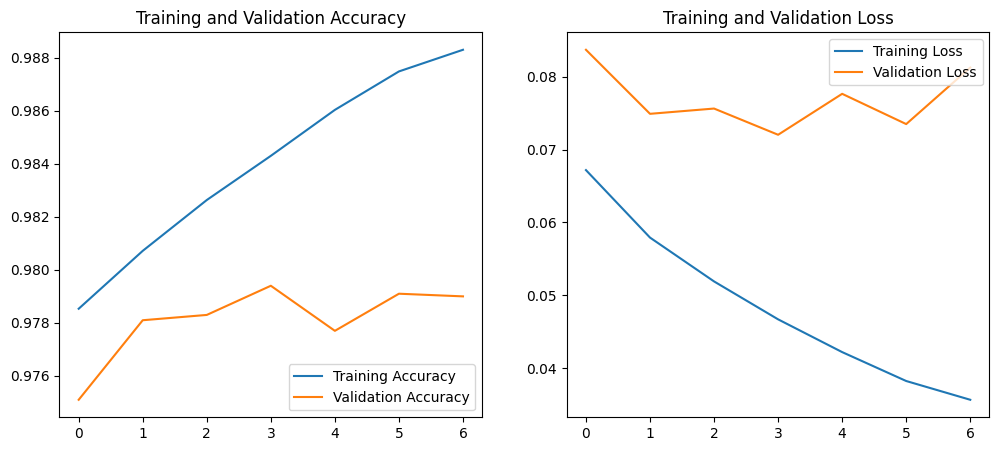

In [ ]:
# Plot training & validation accuracy
def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs_range = range(len(acc))

    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Training Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')

    plt.show()

plot_history(history)